## Bem-vindo!

##### Esse projeto visa calcular a capacitância em capacitores de placas paralelas, permitindo a simulação interativa de associações em série e paralelo, com o intuito de analisar a influência da geometria e de materiais dielétricos na capacidade de armazenamento de carga.

**Feito por:** Arthur de Carvalho, Marcel Figueredo e Paulo de Pinho

**Bibliotecas externas usadas:** Matplotlib

**Constante usada para permissividade do vácuo ($\epsilon_0$):** $8,854 \times 10^{-12}$ F/m

#### Tabela de constantes dielétricas (k) por material:

| Material     | k      |
| ------------ | ------ |
| Vácuo        | 1,0    |
| Ar           | 1,0006 |
| Poliestireno | 2,6    |
| Plástico     | 3,0    |
| Papel        | 4,2    |
| Vidro        | 5,1    |
| Porcelana    | 6,0    |
| Alumina      | 8,5    |

In [33]:
# --- Importando bibliotecas e declarando constantes globais ---

import unicodedata # para normalizar textos (nativa do Python)
import matplotlib.pyplot as plt # para plotar gráficos (biblioteca externa)

EPSILON_0 = 8.854e-12 # permissividade do vácuo (Farads por metro)

materiais_dieletricos = { # dicionário de materiais dielétricos (Constante k)
    'vacuo': 1.0,
    'ar': 1.0006,
    'poliestireno': 2.6,
    'plastico': 3.0,
    'papel': 4.2,
    'vidro': 5.1,
    'porcelana': 6.0,
    'alumina': 8.5
}

In [34]:
# --- Funções de cálculos físicos ---

# Para calcular a capacitância individual de um capacitor:
def calcular_capacitancia_individual(area_cm2, dist_mm, material): 
    # garante que erros não gerem problemas:
    if dist_mm <=0:
        raise ValueError("A distância entre as placas deve ser maior que zero.")
    if area_cm2 <=0:
        raise ValueError("A área das placas deve ser maior que zero.")
    if material not in materiais_dieletricos:
        raise ValueError("Material dielétrico desconhecido. Escolha entre: " + ", ".join(materiais_dieletricos.keys()))
    # primeiro converte os dados fornecidos para o SI:
    area_m2 = area_cm2 * 1e-4 # cm² para m²
    dist_m = dist_mm * 1e-3 # mm para m

    # depois realiza o cálculo:
    k = materiais_dieletricos[material] # constante Dielétrica com base no nome do material fornecido
    return (k * EPSILON_0 * area_m2) / dist_m # fórmula: C = (k * E0 * A) / d

# Para calcular a capacitância equivalente de uma associação de capacitores em série:
def calcular_capacitancia_serie(capacitancia_individual, num_capacitores):
    if num_capacitores <= 0:
        raise ValueError("O número de capacitores deve ser pelo menos 1.")
    return capacitancia_individual / num_capacitores # fórmula: Ceq = C / n

# Para calcular a capacitância equivalente de uma associação de capacitores em paralelo:
def calcular_capacitancia_paralelo(capacitancia_individual, num_capacitores):
    if num_capacitores <= 0:
        raise ValueError("O número de capacitores não pode ser negativo.")
    return capacitancia_individual * num_capacitores # fórmula: Ceq = C * n

In [35]:
# --- Funções auxiliares ---

# Para converter Farads para pF, nF ou µF automaticamente (para melhor leitura):
def formatar_capacitancia(valor_farads): 
    if valor_farads == 0:
        return "0 F"
    if valor_farads < 1e-9:
        return f"{valor_farads * 1e12:.2f} pF" # PicoFarads
    elif valor_farads < 1e-6:
        return f"{valor_farads * 1e9:.2f} nF"  # NanoFarads
    else:
        return f"{valor_farads * 1e6:.2f} µF"  # MicroFarads

# Para facilitar a leitura de valores com casas decimais:
def ler_valor_float(mensagem): 
    return float(input(mensagem).replace(',', '.')) # lê o input do usuário, troca vírgula por ponto (se houver), converte para float e o retorna

# Para facilitar a leitura de valores inteiros:
def ler_valor_int(mensagem): 
    return int(input(mensagem)) # lê o input do usuário, converte para int e o retorna

# Para remover acentos e deixar texto minúsculo:
def normalizar_texto(texto_irregular): 
    texto_nfd = unicodedata.normalize('NFD', texto_irregular) # normaliza para NFD (separa acento da letra)
    texto_sem_acentos_binario = texto_nfd.encode('ascii', 'ignore') # converte para ASCII ignorando os caracteres não-ASCII (os acentos)
    texto_sem_acentos = texto_sem_acentos_binario.decode('utf-8') # decodifica de volta para string
    return texto_sem_acentos.lower() # retorna o texto normalizado e minúsculo

In [36]:
# --- Solicitando os valores iniciais ---

print("\n--- Entrada de Dados ---")

# Usando as funções blindadas (elas já garantem que não entra zero nem negativo)
area_cm2 = ler_valor_float("Informe a área das placas do capacitor (em cm²): ")
dist_mm = ler_valor_float("Informe a distância das placas do capacitor (em mm): ")

# BLOCO DE PROTEÇÃO DO MATERIAL (Evita KeyError)
while True:
    # Mostra as opções disponíveis para ajudar o usuário
    opcoes = ", ".join(materiais_dieletricos.keys())
    print(f"\nMateriais disponíveis: {opcoes}")
    
    entrada_material = input("Informe o nome do material dielétrico: ")
    material = normalizar_texto(entrada_material)
    
    # Verifica se a chave existe no dicionário antes de tentar acessar
    if material in materiais_dieletricos:
        k = materiais_dieletricos[material]
        print(f"-> Material '{material}' selecionado (k={k})")
        break # Sai do loop porque deu certo
    else:
        print(f"⚠️ Erro: O material '{entrada_material}' não foi encontrado. Tente novamente.")

# Lê o número de capacitores (Blindado contra zero e negativos)
num_capacitores = ler_valor_int("\nInforme o número de capacitores a serem associados: ")

# --- Calculando capacitâncias ---
# Como garantimos que dist_mm > 0 e num_capacitores > 0 nas leituras acima,
# essas funções agora estão seguras para rodar sem travar.

capacitancia_individual = calcular_capacitancia_individual(area_cm2, dist_mm, material)
capacitancia_serie = calcular_capacitancia_serie(capacitancia_individual, num_capacitores)
capacitancia_paralelo = calcular_capacitancia_paralelo(capacitancia_individual, num_capacitores)


--- Entrada de Dados ---

Materiais disponíveis: vacuo, ar, poliestireno, plastico, papel, vidro, porcelana, alumina
-> Material 'ar' selecionado (k=1.0006)


--- Resultados dos Cálculos (SI) ---
Área das placas: 0.003 m²
Distância entre as placas: 0.05 m
Constante dielétrica: 1.0006
Número de capacitores: 4
Capacitância individual dos capacitores: 5.315587439999999e-13
Capacitância equivalente em paralelo: 2.1262349759999995e-12
Capacitância equivalente em série: 1.3288968599999997e-13
---------------------------------

Gerando gráfico de Capacitância...


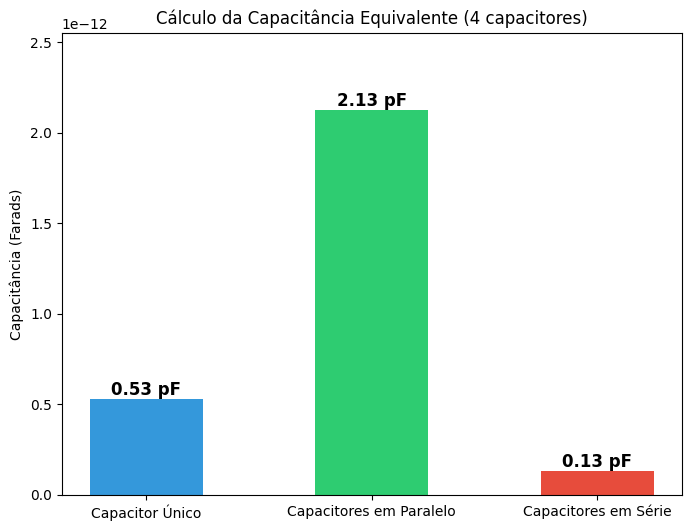

In [37]:
# --- Imprimindo valores dos cálculos de capacitância ---
print("--- Resultados dos Cálculos (SI) ---")
print(f"Área das placas: {area_cm2 * 1e-4} m²") # cm² para m²
print(f"Distância entre as placas: {dist_mm * 1e-3} m") # mm para m
print(f"Constante dielétrica: {k}")
print(f"Número de capacitores: {num_capacitores}")

print(f"Capacitância individual dos capacitores: {capacitancia_individual}")
print(f"Capacitância equivalente em paralelo: {capacitancia_paralelo}")
print(f"Capacitância equivalente em série: {capacitancia_serie}")
print("---------------------------------")
print("") # quebra de linha
 
# --- Plotando gráfico de capacitância ---

# Declarando variáveis para o gráfico:
nomes = ['Capacitor Único', 'Capacitores em Paralelo', 'Capacitores em Série'] # definindo rótulos para os valores exibidos no gráfico
valores = [capacitancia_individual, capacitancia_paralelo, capacitancia_serie] # definindo valores a serem exibidos
cores = ['#3498db', '#2ecc71', '#e74c3c'] # definindo cores para as barras do gráfico

# Construindo o gráfico:
fig, ax = plt.subplots(figsize=(8, 6)) # declarando gráfico
barras = ax.bar(nomes, valores, color=cores, width=0.5) # declarando barras do gráfico
ax.set_title(f'Cálculo da Capacitância Equivalente ({num_capacitores} capacitores)') # definindo título do gráfico
ax.set_ylabel('Capacitância (Farads)') # definindo rótulo vertical

# Adicionando o valor da capacitância formatado em cima de cada barra:
for barra, valor in zip(barras, valores):
        height = barra.get_height()
        texto = formatar_capacitancia(valor)
        ax.text(barra.get_x() + barra.get_width()/2., height,
                f'{texto}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Fazendo um ajuste para garantir que as barras não fiquem coladas no topo
ax.set_ylim(0, max(valores) * 1.2)

print("Gerando gráfico de Capacitância...")
plt.show()